# Задание 1
1.1 Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом

In [1]:
#читаем файл
with open ("HP.txt", "r", encoding="utf-8") as hp:
    hp = hp.read()
hp = hp.lower()
punct = "!?«»'—'.,-"                 #очищаем от пунктуации
all_words = hp.split()
depuncted = []    
for word in all_words: 
    word = word.strip(punct)
    depuncted.append(word)
hp2 = " ".join(depuncted)

         
#лемматизация текста и запись в новый файл
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
wnl = WordNetLemmatizer()
wnl.lemmatize(hp2)
#записываем в отдельный файл
with open('hp_lemm.txt', 'w', encoding='utf-8') as f: 
    for d in hp2:
        f.write(d)
    f.close()

1.2 Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном частотном словаре, а по оси Y - относительная частота (не ipm, а просто абсолютная частота, разделенная на количество слов в тексте)

In [33]:
#высчитываем x - ранг (порядковый номер) слова в отсортированном частотном словаре
#создаем отсортированный по частотности список 
from collections import Counter 
counts = Counter(hp2.split())
counts_dict = dict(counts)
# сортируем словарь
sorted_counts = sorted(counts_dict.items(), key=lambda x: x[1], reverse=True)
a = dict(sorted_counts) 
#меняем значение в словаре на порядковый номер
a1 = {key: rank for rank, key in enumerate(sorted(bb, key=bb.get), 1)}

In [34]:
#выссчитаем y -  относительная частота 

quant = len(hp2.split()) 
y = {}  

#создаем цикл который будет записывать в словарь новые ключи и значения
for word, count in counts_dict.items(): 
    chastota = count/quant 
    y[word] = chastota 

# сортируем словарь
sorted_y = sorted(y.items(), key=lambda x: x[1], reverse=True)
b = dict(sorted_y) 

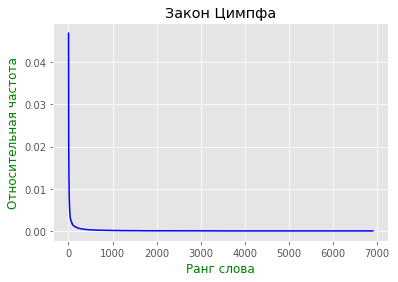

In [36]:
#создаем график
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

X = list(a1.values()) 
Y = list(b.values()) 
         
plt.plot(X,Y, color='b'), 
plt.title("Закон Цимпфа")
plt.xlabel("Ранг слова", color ='g')
plt.ylabel("Относительная частота", color ='g')
plt.show()

1.3 Очистите текст от стоп-слов.Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [27]:
# очищаем от стоп-слов
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = stopwords.words('english') #заносим в переменную английские стоп-слова из библиотеки

no_stop_words = [w for w in word_tokenize(hp2) if w not in sw]



In [37]:
#с помощью counts считаем частотность слов в тексте
counts1 = Counter(no_stop_words)
counts_dict1 = dict(counts1) 

sorted_counts1 = sorted(counts_dict1.items(), key=lambda x: x[1], reverse=True)
sorted_counts2 = dict(sorted_counts1) #словарь делаем из массива
w = sorted_counts2.keys()
w1 = list(z) #массив слов 
r = sorted_counts2.values()
r1 = list(r) 

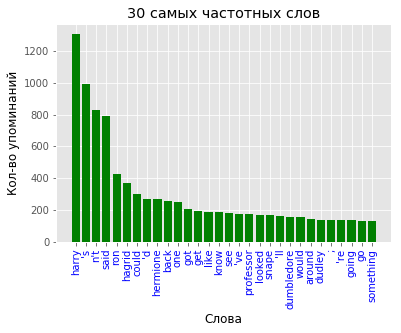

In [38]:
#создаем график
X = [i for i in range(0,30)] 
Y = r1[:30] 

plt.bar(X, Y, color='g')
plt.xticks(X, w1, color='b', rotation=90) 
plt.title("30 самых частотных слов", color='black')
plt.xlabel("Слова", color='black')
plt.ylabel("Кол-во упоминаний", color='black')
plt.show()